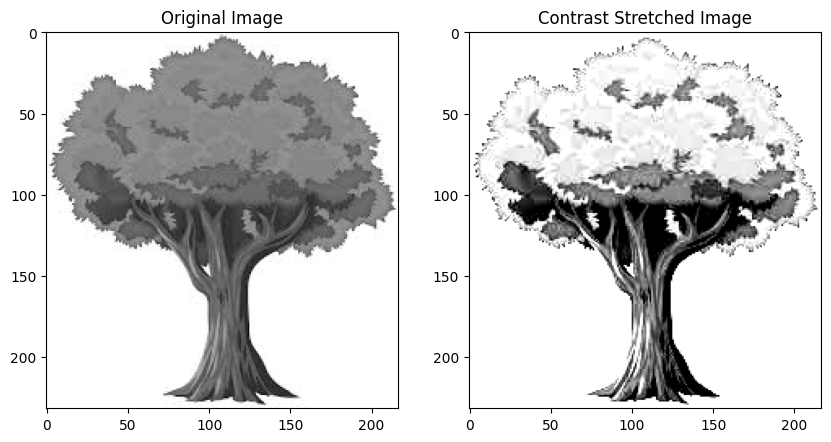

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the contrast stretching function
def contrast_stretching(img, r1, s1, r2, s2):
    def pixel_val(pix):
        if 0 <= pix and pix <= r1:
            return (s1 / r1) * pix
        elif r1 < pix and pix <= r2:
            return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

    stretched = np.zeros(img.shape, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            stretched[i, j] = pixel_val(img[i, j])
    return stretched

# Set the parameters for contrast stretching
r1, s1, r2, s2 = 70, 0, 140, 255

# Apply contrast stretching
contrast_stretched_image = contrast_stretching(image, r1, s1, r2, s2)

# Display the original and contrast-stretched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Contrast Stretched Image")
plt.imshow(contrast_stretched_image, cmap='gray')
plt.show()


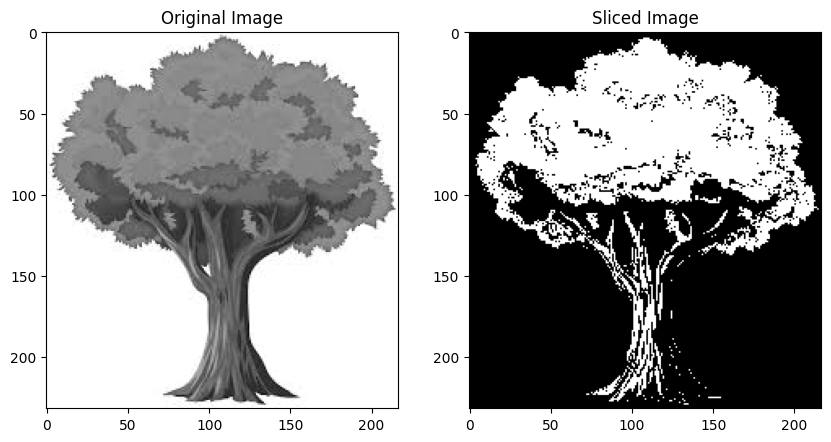

In [3]:
# Define the intensity level slicing function
def intensity_level_slicing(img, min_range, max_range):
    sliced = np.zeros(img.shape, dtype=np.uint8)

    sliced[(img >= min_range) & (img <= max_range)] = 255
    return sliced

# Set the range for intensity level slicing
min_range, max_range = 100, 150

# Apply intensity level slicing
sliced_image = intensity_level_slicing(image, min_range, max_range)

# Display the original and sliced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Sliced Image")
plt.imshow(sliced_image, cmap='gray')
plt.show()


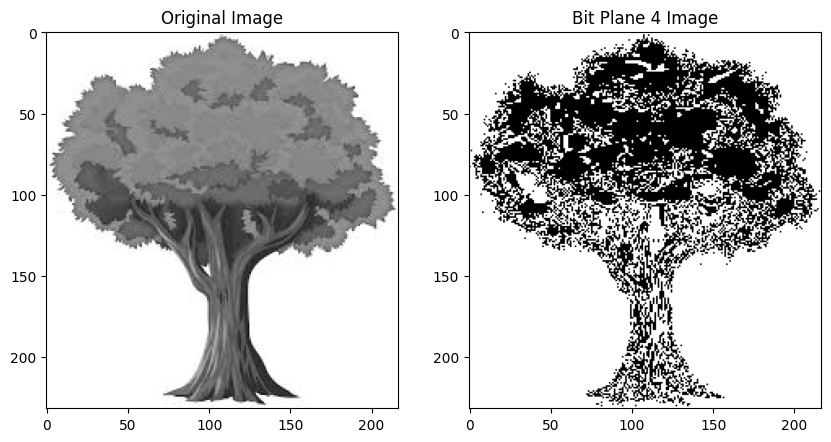

In [4]:
def bit_plane_slicing(img, bit):
    rows, cols = img.shape
    bit_plane = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            bit_plane[i, j] = (img[i, j] >> bit) & 1
    return bit_plane * 255

bit = 4

bit_plane_image = bit_plane_slicing(image, bit)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f"Bit Plane {bit} Image")
plt.imshow(bit_plane_image, cmap='gray')
plt.show()


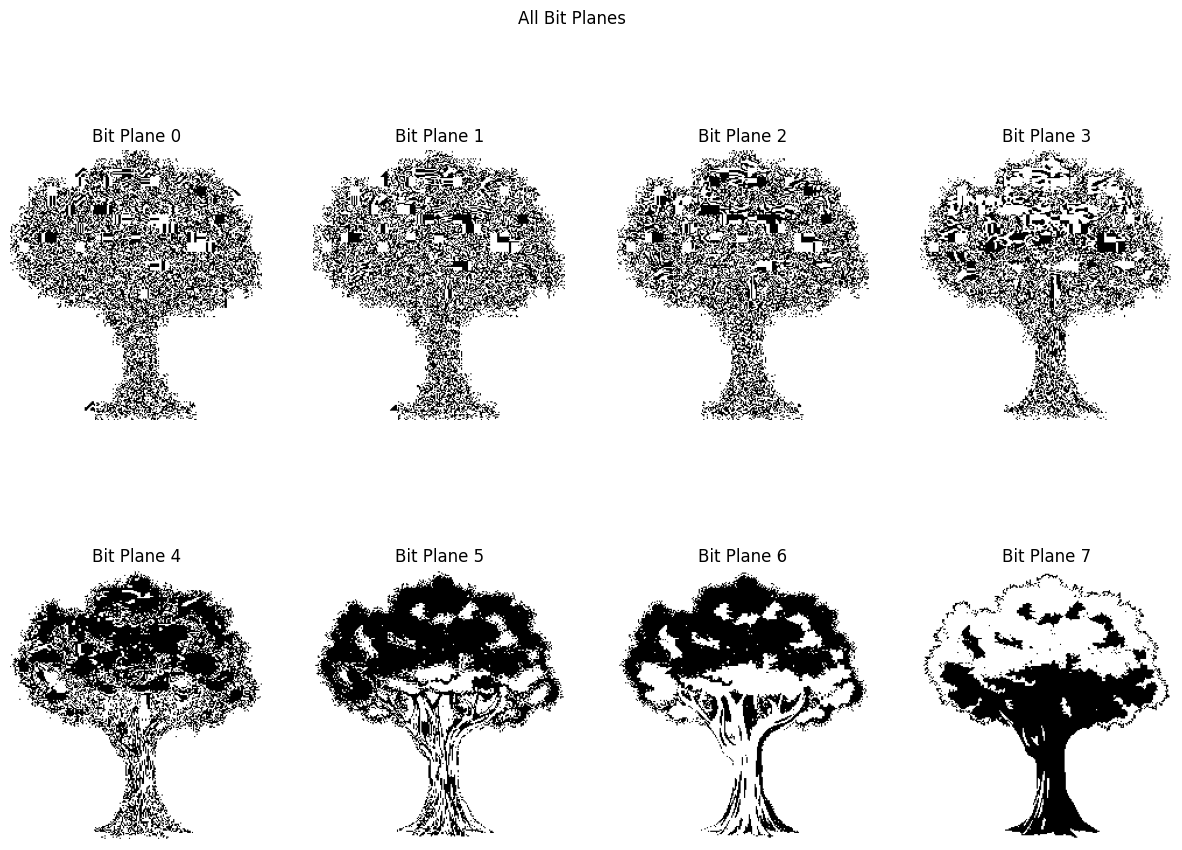

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)

def bit_plane_slicing(img, bit):
    rows, cols = img.shape
    bit_plane = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            bit_plane[i, j] = (img[i, j] >> bit) & 1
    return bit_plane * 255

plt.figure(figsize=(15, 10))

for bit in range(8):
    bit_plane_image = bit_plane_slicing(image, bit)
    plt.subplot(2, 4, bit + 1)
    plt.title(f"Bit Plane {bit}")
    plt.imshow(bit_plane_image, cmap='gray')
    plt.axis('off')

plt.suptitle("All Bit Planes")
plt.show()
